In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx #conda install networkx to do
import igraph as ig #à installer
import leidenalg as la #à installer

In [2]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003.0,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003.0,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003.0,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003.0,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


Louvain or Leiden algo (improvement of Louvain) = https://www.nature.com/articles/s41598-019-41695-z
 
--> "Louvain algorithm has a major problem, for both modularity and CPM. The algorithm may yield arbitrarily badly connected communities, over and above the well-known issue of the resolution limit14. Communities may even be internally disconnected."

--> Implémentation: https://readthedocs.org/projects/leidenalg/downloads/pdf/latest/

## Louvain algo

In [7]:
def compute_com_size(community_list):
    community_size=np.zeros(len(community_list), dtype=int)
    for n, com in enumerate(community_list):
        community_size[n]=len(com)
    return(community_size)

In [8]:
def extract_community_louvain(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #extract communities with Louvain algorithm 
    G_community=nx.community.louvain_communities(G, seed=1234)
    
    return G_community

In [9]:
#create the dataframe
columns = ['Year', 'Vote', 'Total nbr of community', 'Size of each community', 'Community members']
df_community=pd.DataFrame(columns=columns)

years=df['Year'].unique()
for n, year in enumerate(years):
    G_community_pos=extract_community_louvain(df, year,1)
    size_communities_pos=compute_com_size(G_community_pos)
    df_community.loc[3*n]=[year, 1, len(size_communities_pos), size_communities_pos, G_community_pos]

    G_community_neg=extract_community_louvain(df, year,-1)
    size_communities_neg=compute_com_size(G_community_neg)
    df_community.loc[3*n+1]=[year, -1, len(size_communities_neg), size_communities_neg, G_community_neg]

    G_community_neu=extract_community_louvain(df, year,0)
    size_communities_neu=compute_com_size(G_community_neu)
    df_community.loc[3*n+2]=[year, 0, len(size_communities_neu), size_communities_neu, G_community_neu]

df_community


,Year,Vote,Total nbr of community,Size of each community,Community members
0,2013.0,1,9,"[57, 35, 131, 67, 153, 96, 62, 3, 105]","[{Inks.LWC, Airplaneman, Espresso Addict, Llam..."
1,2013.0,-1,11,"[35, 29, 20, 23, 50, 35, 31, 17, 26, 33, 50]","[{Bwilkins, OrenBochman, Espresso Addict, Dies..."
2,2013.0,0,11,"[15, 13, 27, 16, 15, 14, 7, 3, 28, 2, 15]","[{nan, Dru of Id, Atama, Ypnypn, Bilby, Beeble..."
3,2012.0,1,9,"[155, 80, 141, 202, 86, 116, 73, 2, 93]","[{nan, Gilderien, The Utahraptor, maxviwe, Isa..."
4,2012.0,-1,13,"[25, 29, 34, 84, 71, 49, 36, 30, 27, 41, 71, 4...","[{Binksternet, MaxSem, Kumioko, Mono, Dusti, H..."
5,2012.0,0,19,"[18, 14, 2, 2, 3, 21, 17, 10, 20, 17, 33, 2, 1...","[{WilyD, Bbb23, UnbelievableError, WaitingForC..."
6,2011.0,1,11,"[125, 68, 62, 301, 114, 189, 107, 127, 79, 2, 1]","[{JoeSperrazza, Enti342, Mann jess, Ace of Spa..."
7,2011.0,-1,13,"[2, 51, 51, 39, 74, 40, 2, 48, 50, 47, 67, 92,...","[{Anomie, It Is Me Here}, {Mindbunny, The C of..."
8,2011.0,0,21,"[22, 4, 12, 9, 34, 18, 9, 3, 25, 33, 22, 2, 2,...","[{nan, KuduIO, Carrite, Mtking, PrincessofLlyr..."
9,2010.0,1,8,"[210, 261, 52, 381, 128, 406, 22, 2]","[{Tyrenius, Favonian, AKMask, 95j, Malinaccier..."


Text(0, 0.5, 'Number of community')

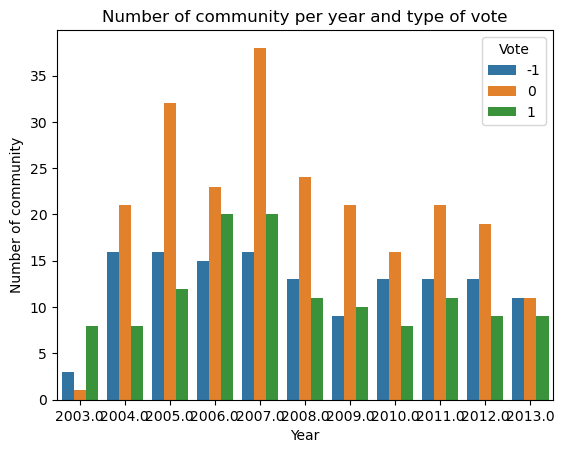

In [10]:
sns.barplot(data=df_community[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')

## Leiden algorithm

In [11]:
def extract_community_leiden(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #convert into ig
    H=ig.Graph.from_networkx(G)

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    
    return partition

In [12]:
def compute_partition_features(partition):
    #gives the number of community we have
    nbr_community=np.max(partition.membership)
    ind_community_size=[]
    for i in range (nbr_community):
        #gives the size of community i+1
        nbr=sum(partition.membership==np.full_like(partition.membership, fill_value=i+1)) 
        ind_community_size.append(nbr)
    return nbr_community, ind_community_size


In [13]:
#create the dataframe
columns_ = ['Year', 'Vote', 'Total nbr of community', 'Size of each community']
df_community_leiden=pd.DataFrame(columns=columns_)

years=df['Year'].unique()
for n, year in enumerate(years):
    partition_pos=extract_community_leiden(df, year,1)
    features_pos=compute_partition_features(partition_pos)
    df_community_leiden.loc[3*n]=[year, 1, features_pos[0], features_pos[1]]

    partition_neg=extract_community_leiden(df, year,-1)
    features_neg=compute_partition_features(partition_neg)
    df_community_leiden.loc[3*n+1]=[year, -1, features_neg[0], features_neg[1]]

    partition_neu=extract_community_leiden(df, year,0)
    features_neu=compute_partition_features(partition_neu)
    df_community_leiden.loc[3*n+2]=[year, 0, features_neu[0], features_neu[1]]

df_community_leiden

,Year,Vote,Total nbr of community,Size of each community
0,2013.0,1,9,"[89, 84, 82, 81, 76, 69, 65, 56, 3]"
1,2013.0,-1,9,"[43, 41, 41, 39, 34, 33, 31, 20, 14]"
2,2013.0,0,10,"[24, 19, 17, 15, 15, 13, 11, 11, 3, 2]"
3,2012.0,1,9,"[185, 119, 103, 96, 86, 60, 58, 48, 2]"
4,2012.0,-1,12,"[65, 57, 46, 40, 39, 37, 36, 36, 36, 34, 32, 31]"
5,2012.0,0,16,"[30, 25, 23, 22, 21, 19, 18, 17, 17, 13, 7, 3,..."
6,2011.0,1,9,"[155, 148, 148, 139, 114, 107, 82, 2, 1]"
7,2011.0,-1,13,"[70, 58, 57, 55, 48, 46, 45, 43, 40, 32, 10, 2..."
8,2011.0,0,20,"[26, 23, 23, 23, 23, 20, 20, 19, 18, 17, 13, 1..."
9,2010.0,1,5,"[341, 285, 268, 179, 2]"


Text(0, 0.5, 'Number of community')

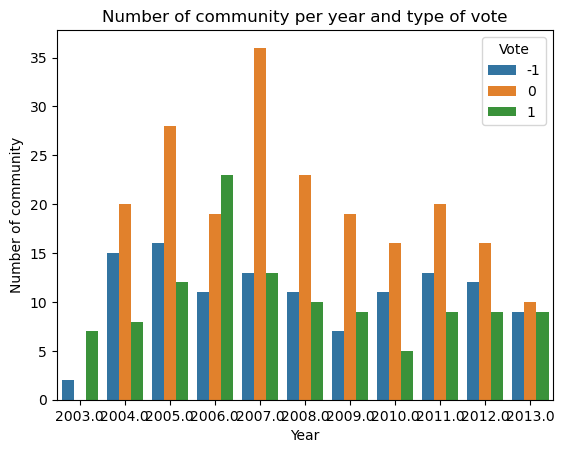

In [14]:
sns.barplot(data=df_community_leiden[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')

--------------

### Leiden and Louvain algorithm comparison

We saw that the Leiden algorithm is an optimised version of the Louvain algorithm we used previously. We want to quantify how much different these two algorithms are in our data. To do that we will look at the relative difference in percentage between the 2 algorithms for each year and per vote category. 

Text(0, 0.5, 'Relative difference in percentage')

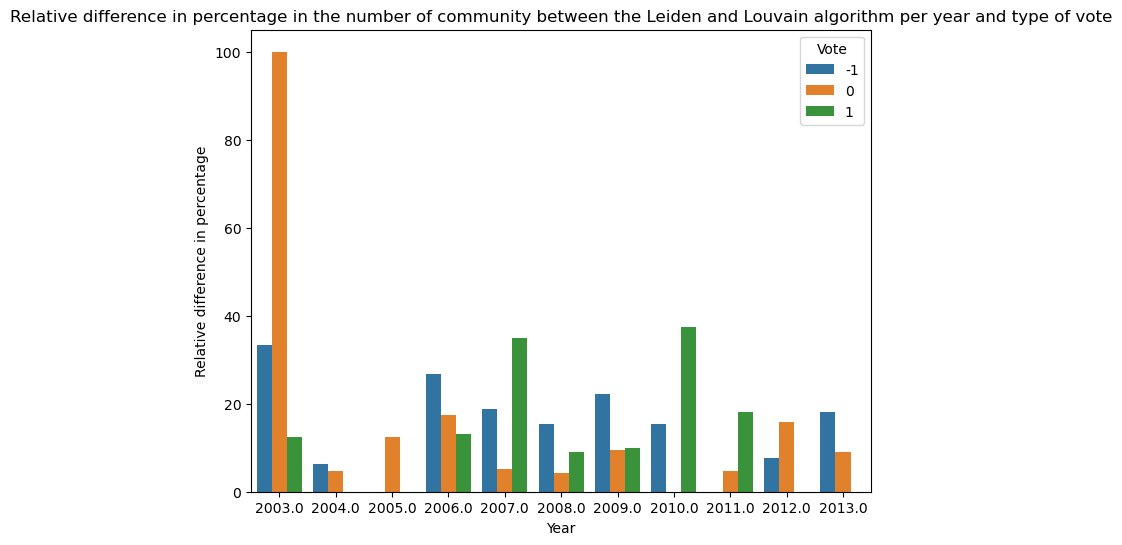

In [81]:
result_df = pd.DataFrame({'Year': df_community_leiden['Year'],
                           'Vote': df_community_leiden['Vote'],
                           'Difference': (df_community['Total nbr of community'] - df_community_leiden['Total nbr of community']).abs()/np.max((df_community['Total nbr of community'],df_community_leiden['Total nbr of community']), axis=0)*100 })

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=result_df[['Year', 'Vote', 'Difference']], x='Year', y='Difference', hue='Vote')

plt.title('Relative difference in percentage in the number of community between the Leiden and Louvain algorithm per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Relative difference in percentage')

In general, we can see that both algorithms differ in the number of community they formed, sometimes even a lot (100% for 2003 and neutral vote). 


In the following we look more precisely at the number of community for each algorithm to be able to better understand where such large differences for some years and vote type come from.  

In [64]:
def plot_comparaison_leiden_louvain_per_type_vote(vote):
    louvain_vote=df_community[df_community['Vote']==vote][['Year', 'Total nbr of community']]
    louvain_vote['Algo']='Louvain'
    leiden_vote=df_community_leiden[df_community_leiden['Vote']==vote][['Year', 'Total nbr of community']]
    leiden_vote['Algo']='Leiden'

    df_combined = pd.concat([louvain_vote, leiden_vote], ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(data=df_combined, x='Year', y='Total nbr of community', hue='Algo')

    plt.title('Number of community per year and vote '+str(vote)+' for the Louvain and Leiden algorithm')
    plt.xlabel('Year')
    plt.ylabel('Number of community')
  


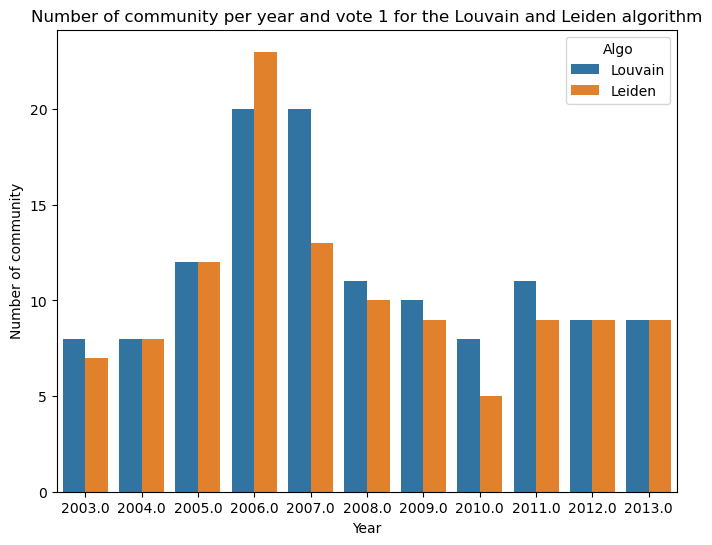

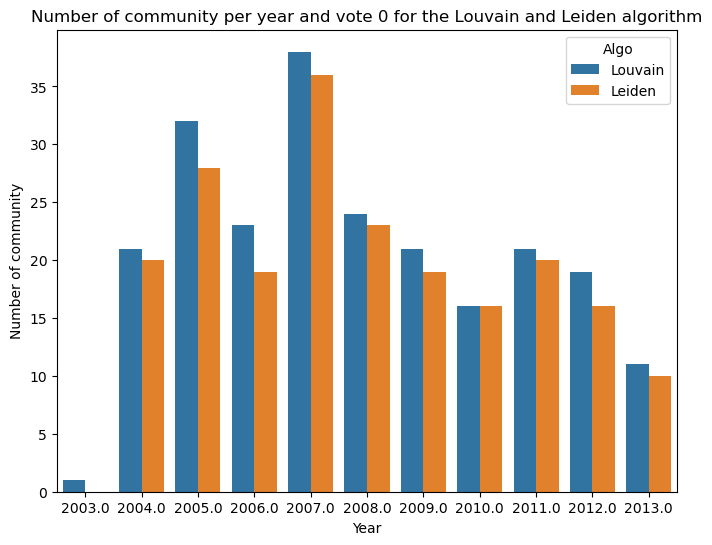

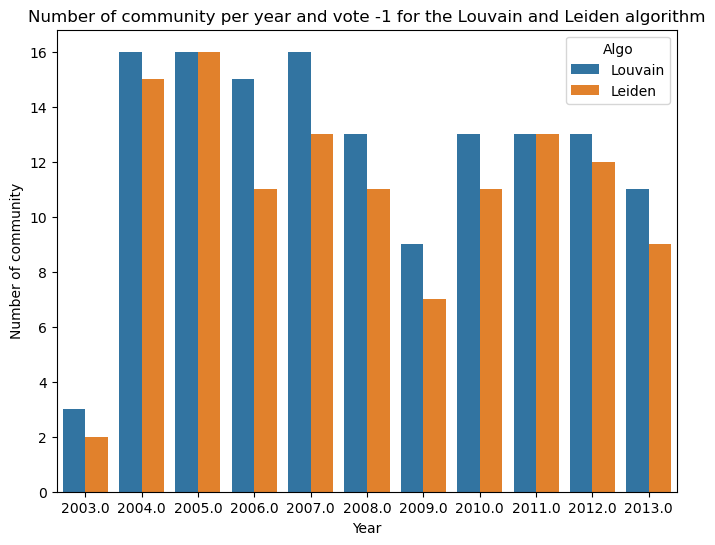

In [65]:
plot_comparaison_leiden_louvain_per_type_vote(1)
plot_comparaison_leiden_louvain_per_type_vote(0)
plot_comparaison_leiden_louvain_per_type_vote(-1)

As we've seen in the previous plot, we have some variations in the number of community: often few (for example in 2004 for all vote type) but sometime more (for instance in 2007 and positive vote). This graphs allows us to explain the 100% relative difference for 2003 on neutral vote. Indeed, the Louvain algorithm found one community whereas Leiden algorithm found none which results in a relative difference of 1 and a percentage of 100%.

In general, we can see some variation between the 2 algorithm. Even if paper mentioned before certifies that Leiden algorithm is more optimized, further analysis would need to be conducted to determine the most appropriate algorithm on our data if we want to build communities. 

### Directed Graph

Until now we extracted communities based on a non directed graph between Source and Target in term of positive, neutral or negative vote. However, considering that the link goes in both way is not that accurate with the data we have. Indeed, we know that a Source voted for a Target but we don't know the interaction a Target has fro a Source. Taking that into account, our graph needs to be directed such that it maps this unilateral interaction. We will look at how directed graph impact our result using Leiden algorithm (indicated as better in the paper cited before)

In [71]:
def extract_community_leiden_directed(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    #print('len of vote 1 for all sources', len(df_year_vote))
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target', create_using=nx.DiGraph())
    #print(type(G))
    #print(G.nodes())
    #convert into ig
    H=ig.Graph.from_networkx(G)

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    return partition

In [78]:
#create the dataframe
columns_ = ['Year', 'Vote', 'Total nbr of community', 'Size of each community']
df_community_leiden_directed=pd.DataFrame(columns=columns_)

years=df['Year'].unique()
for n, year in enumerate(years):
    partition_pos=extract_community_leiden_directed(df, year,1)
    features_pos=compute_partition_features(partition_pos)
    df_community_leiden_directed.loc[3*n]=[year, 1, features_pos[0], features_pos[1]]

    partition_neg=extract_community_leiden_directed(df, year,-1)
    features_neg=compute_partition_features(partition_neg)
    df_community_leiden_directed.loc[3*n+1]=[year, -1, features_neg[0], features_neg[1]]

    partition_neu=extract_community_leiden(df, year,0)
    features_neu=compute_partition_features(partition_neu)
    df_community_leiden_directed.loc[3*n+2]=[year, 0, features_neu[0], features_neu[1]]

df_community_leiden_directed

,Year,Vote,Total nbr of community,Size of each community
0,2013.0,1,10,"[79, 73, 71, 70, 68, 67, 57, 46, 44, 3]"
1,2013.0,-1,10,"[41, 36, 33, 32, 31, 31, 28, 21, 21, 20]"
2,2013.0,0,9,"[24, 24, 16, 16, 15, 14, 14, 3, 2]"
3,2012.0,1,8,"[218, 140, 120, 100, 91, 22, 22, 2]"
4,2012.0,-1,10,"[69, 68, 67, 65, 56, 55, 42, 36, 32, 11]"
5,2012.0,0,16,"[27, 26, 22, 21, 20, 19, 19, 19, 18, 14, 7, 3,..."
6,2011.0,1,10,"[203, 165, 161, 129, 101, 78, 69, 61, 2, 1]"
7,2011.0,-1,12,"[74, 67, 66, 60, 57, 52, 50, 44, 24, 10, 2, 2]"
8,2011.0,0,18,"[28, 27, 25, 25, 25, 24, 24, 23, 21, 19, 12, 9..."
9,2010.0,1,6,"[355, 344, 279, 85, 42, 2]"


Text(0, 0.5, 'Relative difference in percentage')

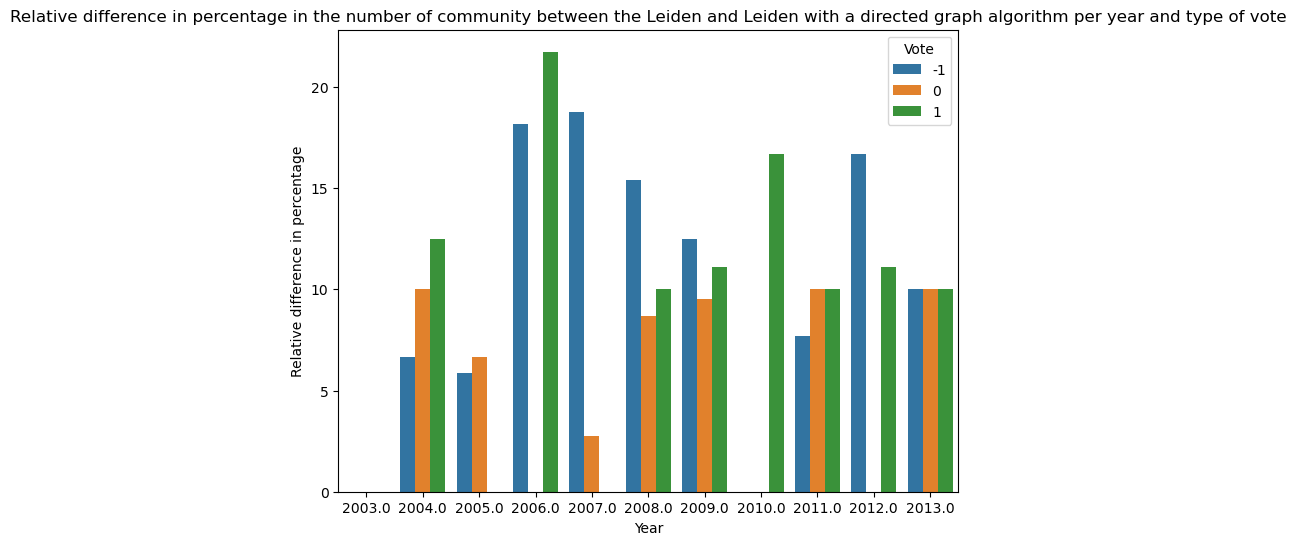

In [82]:
comparison_directed_df = pd.DataFrame({'Year': df_community_leiden_directed['Year'],
                           'Vote': df_community_leiden_directed['Vote'],
                           'Difference': (df_community_leiden_directed['Total nbr of community'] - df_community_leiden['Total nbr of community']).abs()/np.max((df_community_leiden_directed['Total nbr of community'],df_community_leiden['Total nbr of community']), axis=0)*100 })

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=comparison_directed_df[['Year', 'Vote', 'Difference']], x='Year', y='Difference', hue='Vote')

plt.title('Relative difference in percentage in the number of community between the Leiden and Leiden with a directed graph algorithm per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Relative difference in percentage')

Looking at this graph, we can see that for some years and vote, we do not have any difference between the Leiden algorithm on a non directed and directed graph: it is the case for 2003 all votes and 2010 for positive and neutral vote for instance. For a large majority of comparison there is a difference between the 2. It is smaller than when we compared Louvain and Leiden non directed graph algorithms but still a difference. It means that adding direction to our graph has indeed an impact and we would need to take it into account in the commnunity algorithm we will use in the next steps of our project